# **Relatório de Análise VIII**

Neste último relatório, nosso obejtivo conistirá em remover os outliers de nossa base de dados.

### **Removendo Outliers**

In [21]:
# Importa o numpy com o apelido np
import numpy as np

# Importa o pandas com o apelido pd
import pandas as pd

# Importa o pyplot com o o apelido plt
from matplotlib import pyplot as plt

# Importa o CSV com os dados de imoveis residenciais
imoveis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dados/Análise de Dados de imóveis/imoveis-residenciais (3).csv', sep=';')

# Exibe as cincos primeiras linhas do dataframe
imoveis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,Apartamento
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,Apartamento
2,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,Casa
3,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
4,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,Apartamento


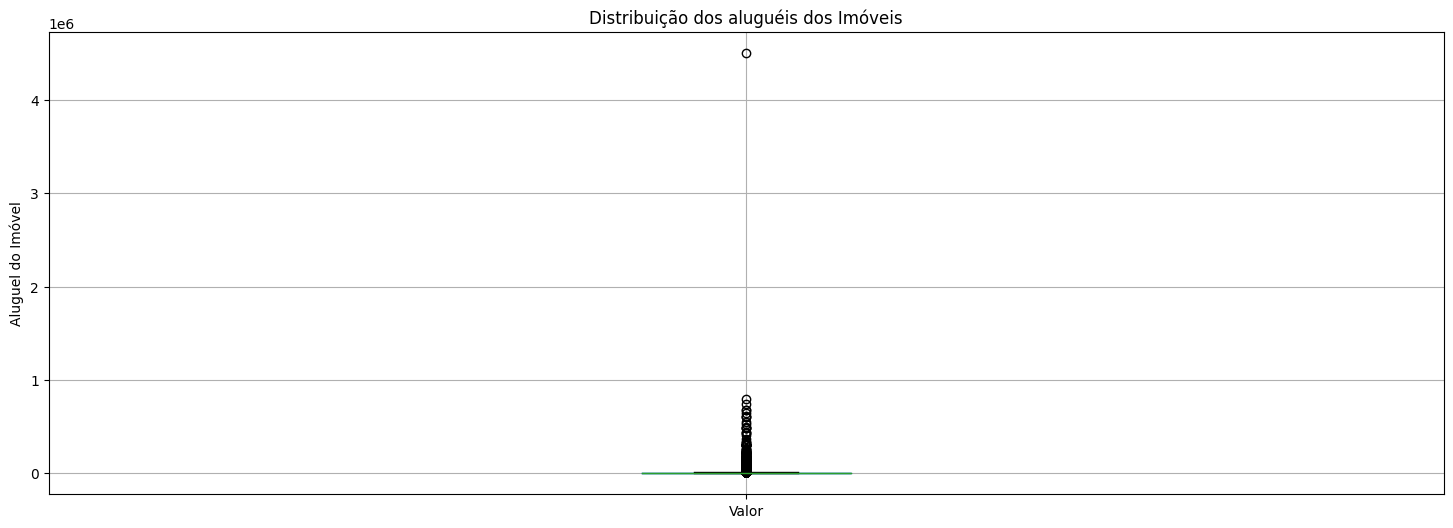

In [22]:
# Cria um box plot para a variável que representa o valor do imóvel
imoveis.boxplot(column = 'Valor', figsize = (18,6))

# Cria um título para o eixo Y
plt.ylabel('Aluguel do Imóvel')

# Cria um título para o gráfico
plt.title('Distribuição dos aluguéis dos Imóveis')

# Exibe o grafico
plt.show()

### **Observação**

Existe um outlier na variavel **valor** com valor acima de R$4.000.000,00. Por isso, a visualização com o boxplot não está tão informativa. Vamos, portanto, remover os outliers

In [23]:
# Exibe os imóveis cujos aluguéis são superiores a R$ 500.000,00
imoveis[imoveis['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
381,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0,614000.0,Apartamento
404,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0,678319.0,Apartamento
1501,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0,775350.0,Apartamento
5793,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,Apartamento
7727,Prédio Inteiro,Barra da Tijuca,0,90,0,4000,650000.0,0.0,0.0,650000.0,Apartamento
8127,Prédio Inteiro,Barra da Tijuca,0,90,0,5130,500000.0,0.0,27000.0,527000.0,Apartamento
8992,Prédio Inteiro,Barra da Tijuca,0,15,0,671,738197.0,18117.0,3208.0,759522.0,Apartamento
11373,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,45,550000.0,880.0,1446.0,552326.0,Apartamento
11684,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,Apartamento
13252,Prédio Inteiro,Barra da Tijuca,0,99,0,8467,677360.0,194741.0,59269.0,931370.0,Apartamento


In [24]:
# Obtém uma série com os valores dos imóveis
valores_dos_imoveis = imoveis['Valor']

# Obtém o valor do primeiro quartil
Q1 = valores_dos_imoveis.quantile(.25)

# Obtém o valor do terceiro quartil
Q3 = valores_dos_imoveis.quantile(.75)

# Calcula o intervalo interquartil
IIQ = Q3 - Q1

# Calcula o limite inferior
limite_inferior = Q1 - 1.5 * IIQ

# Calcula o limite superior
limite_superior = Q3 + 1.5 * IIQ

In [25]:
# Filtro para manter somente os valores que estão dentro dos limites
criterios = (valores_dos_imoveis >= limite_inferior) & (valores_dos_imoveis <= limite_superior)

# Filtra os imóveis, mantendo somente aqueles que atendem aos critérios
imoveis = imoveis[criterios]

# Exibe os 10 primeiros imóveis que atendem aos critérios
imoveis.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,Apartamento
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,Apartamento
3,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
4,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,Apartamento
5,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,Apartamento
7,Flat,Botafogo,3,1,1,80,3800.0,1040.0,0.0,4840.0,Apartamento
8,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,2436.0,Apartamento
9,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,2738.0,Apartamento
10,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,10195.0,Casa
11,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,2700.0,Apartamento


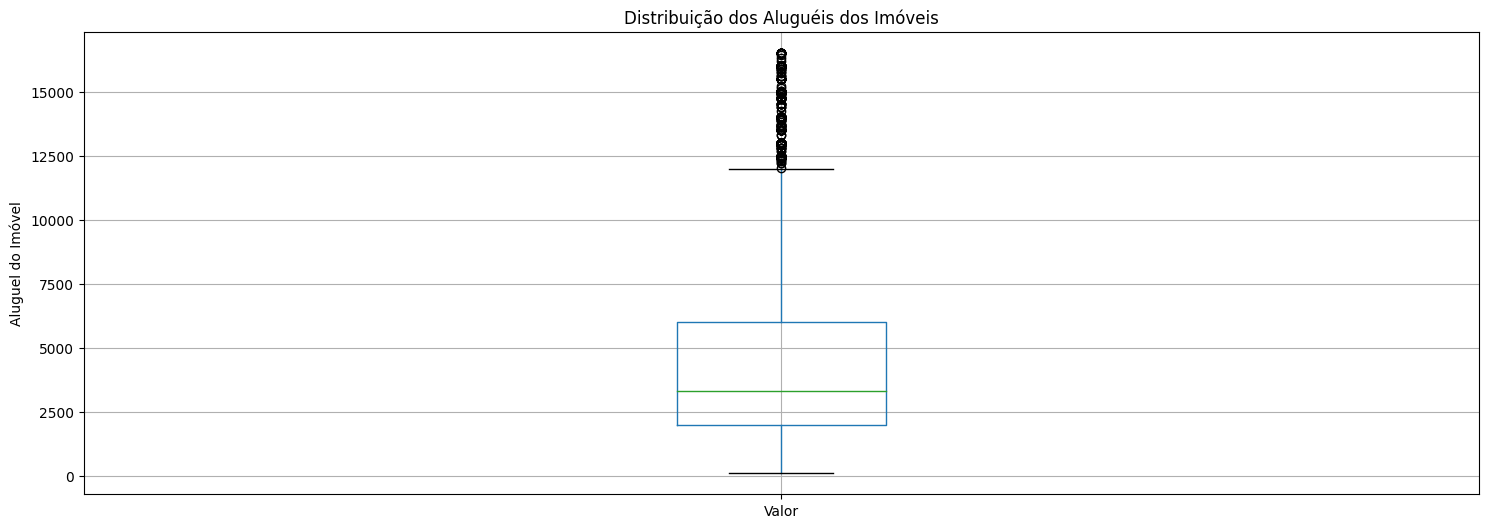

In [26]:
imoveis.boxplot(column ='Valor', figsize = (18,6))
plt.title('Distribuição dos Aluguéis dos Imóveis')
plt.ylabel('Aluguel do Imóvel')
plt.show()

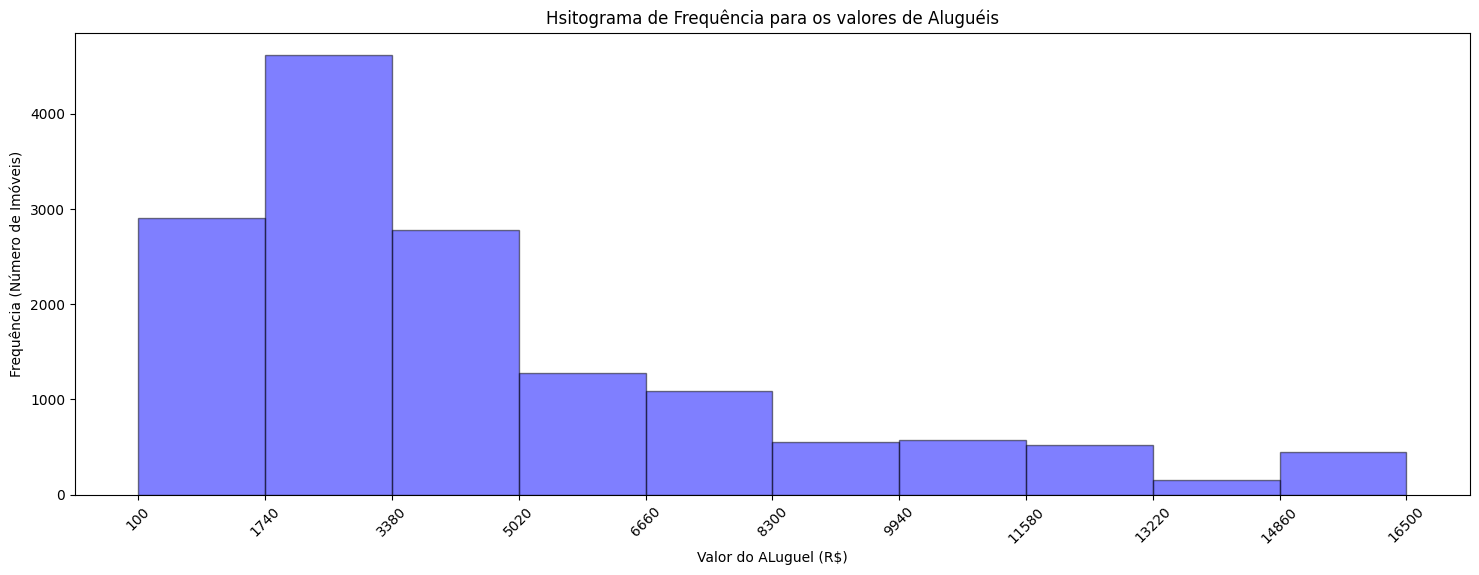

In [38]:
# Obtém as fronteiras das classes do histograma
limites_classes = np.histogram_bin_edges(imoveis['Valor'], bins = 10)

# Define um tamanho para a figura
plt.figure(figsize=(18,6))

# Cria um histograma a partir da variável valor do aluguel
plt.hist(x = 'Valor', bins = limites_classes, data = imoveis, alpha = 0.5, color ='b', edgecolor = 'k')

# Define os marcadores do eixo X
plt.xticks(limites_classes, rotation = 45)

# Define uma legenda para o eixo X
plt.xlabel('Valor do ALuguel (R$)')

# Define uma legenda para o eixo Y
plt.ylabel('Frequência (Número de Imóveis)')

# Define um título para o gráfico
plt.title('Hsitograma de Frequência para os valores de Aluguéis')

# Exibe o gráfico
plt.show()

Este histograma mostra uma distribuição assimétrica à direita, significando que há uma concentração maior dos valores de aluguel menores.

In [28]:
# Agrupa os imóveis por tipo
tipos_de_imoveis = imoveis.groupby('Tipo')['Valor']

# Calcula o primeiro quartil
Q1 = tipos_de_imoveis.quantile(.25)

# Calcula o terceiro quartil
Q3 = tipos_de_imoveis.quantile(.75)

# Calcula o intervalor interquartil
IIQ = Q3 - Q1

# Calcula o limite inferior
limite_inferior = Q1 - 1.5 * IIQ

# Calcula o limite superior
limite_superior = Q3 + 1.5 * IIQ

In [29]:
Q1

Tipo
Apartamento                    2300.0
Box/Garagem                     310.0
Casa                           4750.0
Casa Comercial                 7000.0
Casa de Condomínio             7900.0
Casa de Vila                   2200.0
Conjunto Comercial/Sala        1090.0
Flat                           2500.0
Galpão/Depósito/Armazém        4900.0
Loft                           2050.0
Loja Shopping/ Ct Comercial    1300.0
Loja/Salão                     2200.0
Pousada/Chalé                  1480.0
Prédio Inteiro                 9675.0
Quitinete                      1100.0
Studio                         1500.0
Terreno Padrão                 9100.0
Name: Valor, dtype: float64

In [30]:
Q3

Tipo
Apartamento                     6087.50
Box/Garagem                      455.00
Casa                           11743.25
Casa Comercial                 15000.00
Casa de Condomínio             12950.00
Casa de Vila                    3990.00
Conjunto Comercial/Sala         3500.00
Flat                            6500.00
Galpão/Depósito/Armazém        14700.00
Loft                            3429.50
Loja Shopping/ Ct Comercial     4000.00
Loja/Salão                      8000.00
Pousada/Chalé                   1480.00
Prédio Inteiro                 15000.00
Quitinete                       1650.00
Studio                          1500.00
Terreno Padrão                 13600.00
Name: Valor, dtype: float64

In [31]:
IIQ

Tipo
Apartamento                    3787.50
Box/Garagem                     145.00
Casa                           6993.25
Casa Comercial                 8000.00
Casa de Condomínio             5050.00
Casa de Vila                   1790.00
Conjunto Comercial/Sala        2410.00
Flat                           4000.00
Galpão/Depósito/Armazém        9800.00
Loft                           1379.50
Loja Shopping/ Ct Comercial    2700.00
Loja/Salão                     5800.00
Pousada/Chalé                     0.00
Prédio Inteiro                 5325.00
Quitinete                       550.00
Studio                            0.00
Terreno Padrão                 4500.00
Name: Valor, dtype: float64

In [32]:
limite_inferior

Tipo
Apartamento                   -3381.250
Box/Garagem                      92.500
Casa                          -5739.875
Casa Comercial                -5000.000
Casa de Condomínio              325.000
Casa de Vila                   -485.000
Conjunto Comercial/Sala       -2525.000
Flat                          -3500.000
Galpão/Depósito/Armazém       -9800.000
Loft                            -19.250
Loja Shopping/ Ct Comercial   -2750.000
Loja/Salão                    -6500.000
Pousada/Chalé                  1480.000
Prédio Inteiro                 1687.500
Quitinete                       275.000
Studio                         1500.000
Terreno Padrão                 2350.000
Name: Valor, dtype: float64

In [33]:
limite_superior

Tipo
Apartamento                    11768.750
Box/Garagem                      672.500
Casa                           22233.125
Casa Comercial                 27000.000
Casa de Condomínio             20525.000
Casa de Vila                    6675.000
Conjunto Comercial/Sala         7115.000
Flat                           12500.000
Galpão/Depósito/Armazém        29400.000
Loft                            5498.750
Loja Shopping/ Ct Comercial     8050.000
Loja/Salão                     16700.000
Pousada/Chalé                   1480.000
Prédio Inteiro                 22987.500
Quitinete                       2475.000
Studio                          1500.000
Terreno Padrão                 20350.000
Name: Valor, dtype: float64

In [34]:
# DataFrame vazio
imoveis_atualizados = pd.DataFrame()

for tipo_de_imovel in tipos_de_imoveis.groups.keys():
  # Critério 1: O tipo do imóvel é igual ao tipo do imóvel desta iteração?
  criterio1 = imoveis['Tipo'] == tipo_de_imovel

  # Critério 2: O valor do aluguel está entre os limites?
  criterio2 = (imoveis['Valor'] >= limite_inferior[tipo_de_imovel]) & (imoveis['Valor'] <= limite_superior[tipo_de_imovel])

  # Filtro
  filtro = criterio1 & criterio2

  # Dataframe filtrando
  imoveis_filtrados = imoveis[filtro]

  # Concatena os dois dataframes
  imoveis_atualizados = pd.concat([imoveis_atualizados, imoveis_filtrados])

In [37]:
imoveis_atualizados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
3,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
8,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,2436.0,Apartamento
9,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,2738.0,Apartamento
11,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,2700.0,Apartamento
13,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,9563.0,Apartamento
14,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0,1547.0,Apartamento
15,Apartamento,Barra da Tijuca,3,3,1,175,4200.0,1500.0,500.0,6200.0,Apartamento
16,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0,3240.0,Apartamento
17,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0,12850.0,Apartamento
18,Apartamento,Copacabana,3,0,0,180,5500.0,1780.0,420.0,7700.0,Apartamento


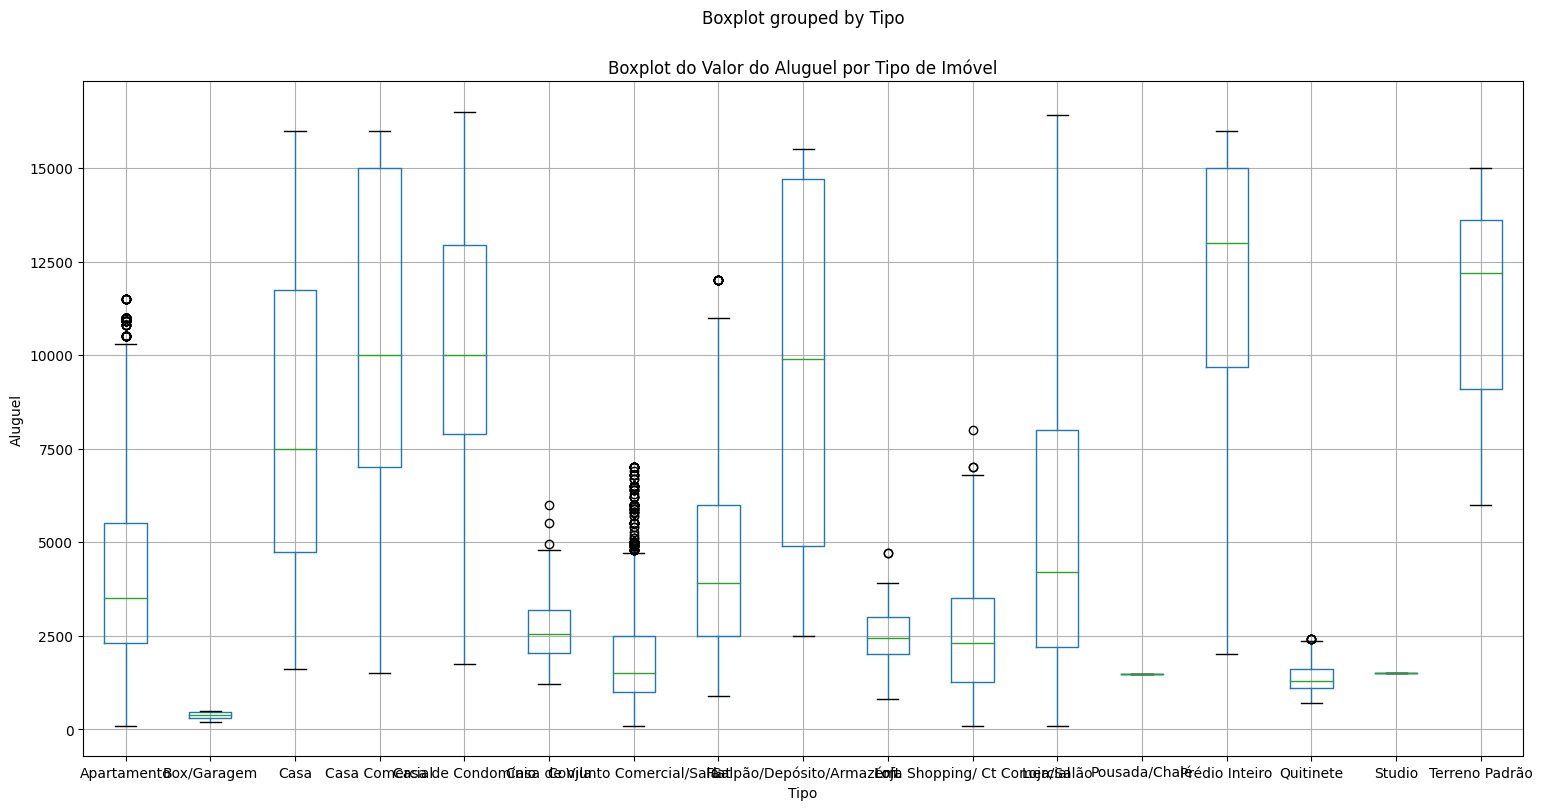

In [42]:
imoveis_atualizados.boxplot(column='Valor', by='Tipo', figsize = (18,9))

# Título do grafico
plt.title('Boxplot do Valor do Aluguel por Tipo de Imóvel')

# Título do eixo y
plt.ylabel('Aluguel')

# Exibe o grafico
plt.show()

In [43]:
# Exporta o dataframe atualizados
imoveis_atualizados.to_csv('imoveis-residenciais.csv', sep=';', index=False)